<a href="https://colab.research.google.com/github/sslo12/Estadistica-I/blob/main/EyP1_P1_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***`7. Construya una Ojiva para la variable “Tiempo que dedican los estudiantes para ayudar a los quehaceres del Hogar'`***

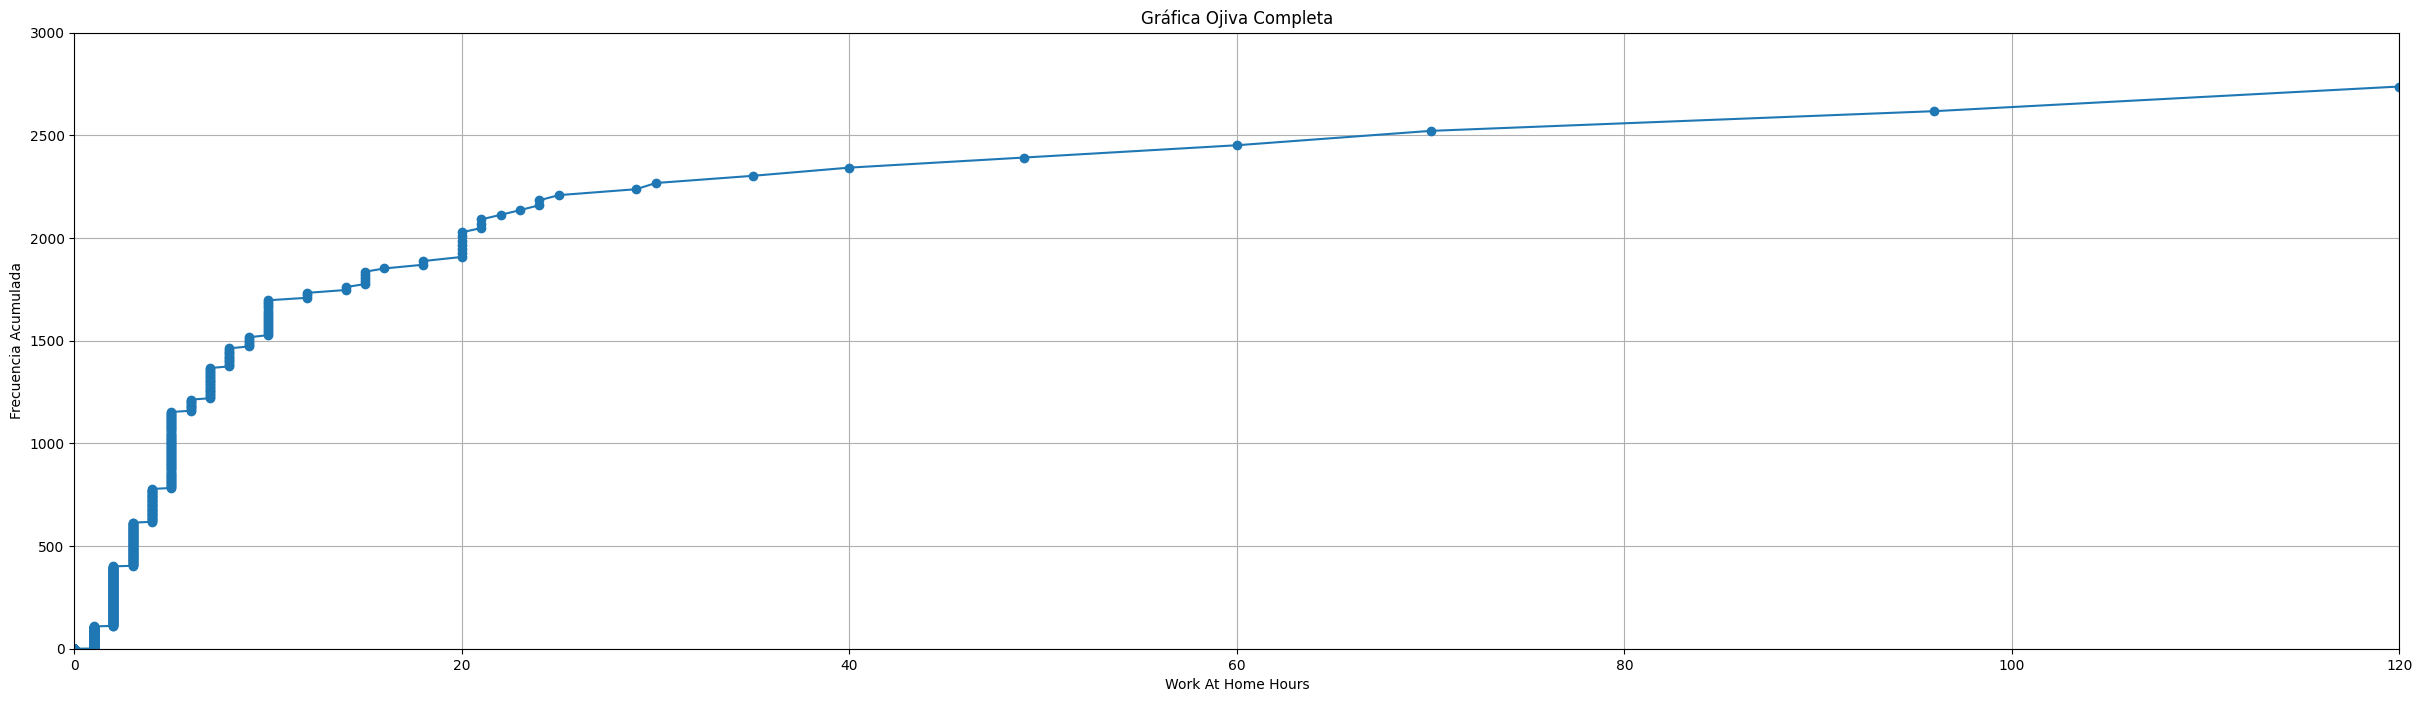

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = pd.read_csv('/DATA_COMBINADO.csv')
df = pd.DataFrame(data)

# Ordena los valores de la columna 'Work_At_Home_Hours'
sorted_hours = df['Work_At_Home_Hours'].sort_values()

# Calcula la frecuencia acumulada
cumulative_frequency = sorted_hours.cumsum()

# Calcula la frecuencia relativa acumulada
#cumulative_relative_frequency = cumulative_frequency / cumulative_frequency.max()

# Crea la gráfica ojiva
plt.figure(figsize=(30, 8))  #Ajustar los valores (ancho, alto)

# Ajusta los límites del eje x para ampliar el intervalo de 0 a 50
plt.ylim(0, 3000)  # Ampliar el intervalo de visualización
plt.xlim(0, 120)  # Ampliar el intervalo de visualización
plt.plot(sorted_hours, cumulative_frequency, marker='o')
plt.title('Gráfica Ojiva Completa')
plt.xlabel('Work At Home Hours')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)
plt.show()


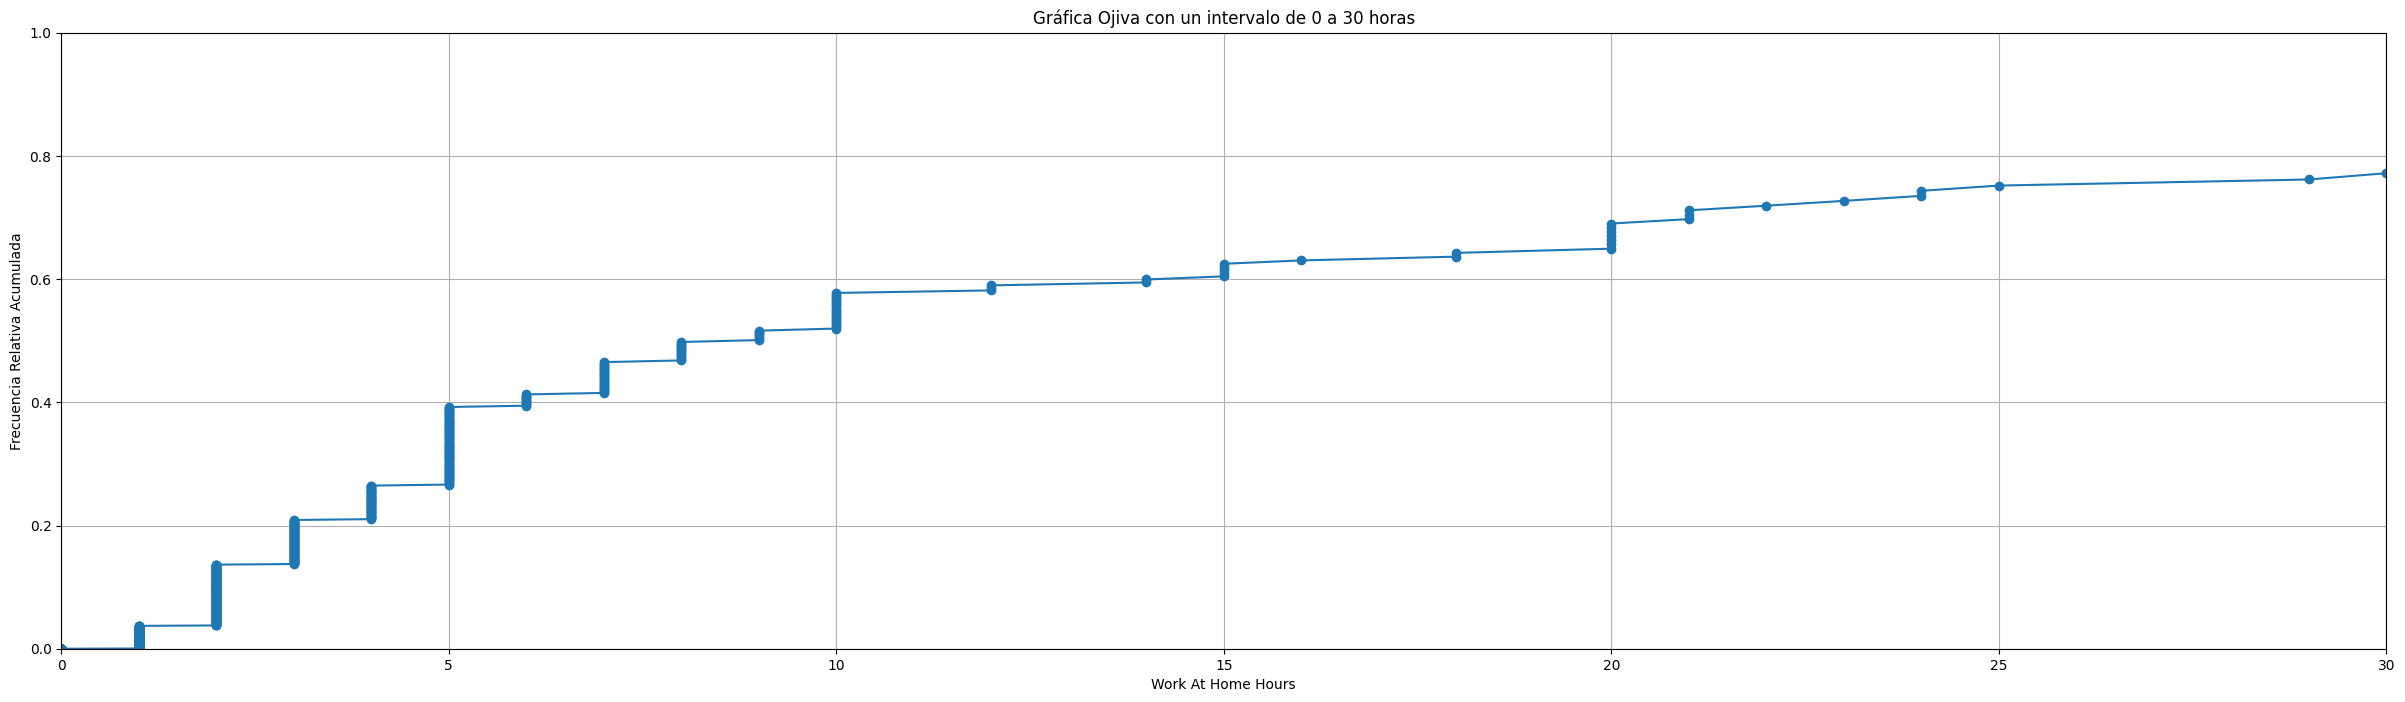

In [ ]:
# Calcula la frecuencia relativa acumulada
cumulative_relative_frequency = cumulative_frequency / cumulative_frequency.max()

# Crea la gráfica ojiva
plt.figure(figsize=(30, 8))  #Ajustar los valores (ancho, alto)

# Ajusta los límites del eje x para ampliar el intervalo de 0 a 50
plt.ylim(0, 1.0)  # Ampliar el intervalo de visualización
plt.xlim(0, 30)  # Ampliar el intervalo de visualización
plt.plot(sorted_hours, cumulative_relative_frequency, marker='o')
plt.title('Gráfica Ojiva con un intervalo de 0 a 30 horas')
plt.xlabel('Work At Home Hours')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.grid(True)
plt.show()

In [ ]:
# a) Porcentaje de estudiantes que dedican mínimo 15 horas
percentage_min_15 = cumulative_relative_frequency[sorted_hours >= 15].min()
print(f'a) Porcentaje de estudiantes que dedican mínimo 15 horas: {percentage_min_15*100:.2f}%')

# b) Porcentaje de estudiantes que dedican máximo 5 horas
percentage_max_5 = cumulative_relative_frequency[sorted_hours <= 5].max()
print(f"b) Porcentaje de estudiantes que dedican máximo 5 horas: {percentage_max_5 * 100:.2f}%")

# c) 15% de los estudiantes ayudan en sus casas máximo cuantas horas
students_15_percent = cumulative_relative_frequency >= 0.15
hours_at_max_15_percent = sorted_hours[students_15_percent].iloc[0]
print(f"c) 15% de los estudiantes ayudan en sus casas máximo {hours_at_max_15_percent:.2f} horas")

# d) 35% de los estudiantes ayudan en sus casas mínimo cuantas horas
students_35_percent = cumulative_relative_frequency >= 0.35
hours_at_min_35_percent = sorted_hours[students_35_percent].iloc[0]
print(f"d) 35% de los estudiantes ayudan en sus casas mínimo {hours_at_min_35_percent:.2f} horas")

# e) Intervalo donde se halla la moda (punto más alto)
index_of_mode = cumulative_relative_frequency.idxmax()
mode_interval = sorted_hours.iloc[index_of_mode]
print(f"e) Intervalo donde se halla la moda: {mode_interval:.2f} horas")

# f) 50% de los estudiantes ayudan en sus casas máximo cuantas horas
students_50_percent = cumulative_relative_frequency >= 0.50
hours_at_max_50_percent = sorted_hours[students_50_percent].iloc[0]
print(f"f) 50% de los estudiantes ayudan en sus casas máximo {hours_at_max_50_percent:.2f} horas")

# g) Promedio y desviación estándar
mean_hours = sorted_hours.mean()
std_deviation_hours = sorted_hours.std()
print(f"g) Promedio de horas: {mean_hours:.2f} horas")
print(f"   Desviación estándar de horas: {std_deviation_hours:.2f} horas")

# h) Tipo de asimetría (usando la asimetría de Fisher)
fisher = sorted_hours.skew()
if fisher > 0:
    fisher_type = "asimetría positiva (cola derecha)"
elif fisher < 0:
    fisher_type = "asimetría negativa (cola izquierda)"
else:
    fisher_type = "simetría"
print(f"h) Tipo de asimetría: {fisher_type}")

a) Porcentaje de estudiantes que dedican mínimo 15 horas: 60.45%
b) Porcentaje de estudiantes que dedican máximo 5 horas: 39.24%
c) 15% de los estudiantes ayudan en sus casas máximo 3.00 horas
d) 35% de los estudiantes ayudan en sus casas mínimo 5.00 horas
e) Intervalo donde se halla la moda: 23.00 horas
f) 50% de los estudiantes ayudan en sus casas máximo 9.00 horas
g) Promedio de horas: 4.07 horas
   Desviación estándar de horas: 10.87 horas
h) Tipo de asimetría: asimetría positiva (cola derecha)


### ***`10. Construya una tabla cruzada entre la variable “Materia preferida en el Colegio” versus la variable “Genero”.`***

Favorite_School_Subject  Art  Computers and technology  English  Geography  \
Gender                                                                       
Female                    56                         3       39          5   
Male                      11                        24       15          4   

Favorite_School_Subject  History  Languages  Mathematics and statistics  \
Gender                                                                    
Female                        30          7                          52   
Male                          54          4                          72   

Favorite_School_Subject  Music  Other  Physical education  Science  \
Gender                                                               
Female                      27     27                  12       47   
Male                        10     30                  59       41   

Favorite_School_Subject  Social studies  
Gender                                   
Female               

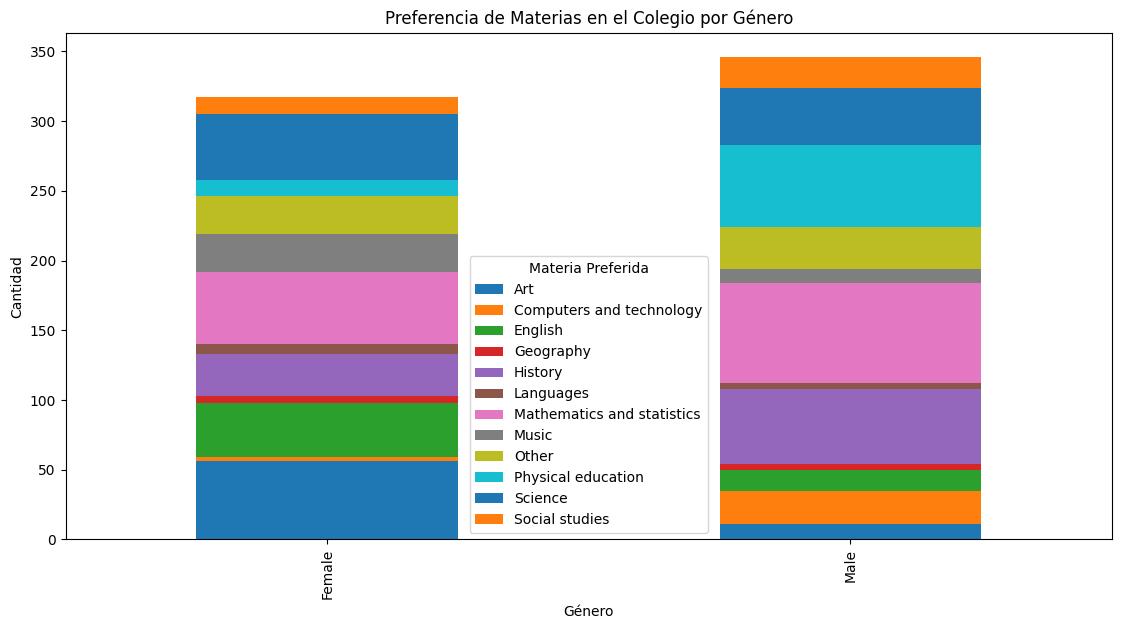

In [ ]:
# Eliminar filas con 'none' en la columna 'Genero'
df = df[df['Gender'] != 'None']
df = df[df['Favorite_School_Subject'] != 'None']

# Crear la tabla cruzada
cross_table = pd.crosstab(df["Gender"], df["Favorite_School_Subject"])

# Imprimir la tabla cruzada
print(cross_table)

# Crear un gráfico de barras apiladas
ax = cross_table.plot(kind="bar", stacked=True, figsize=(13.5, 6.58))
plt.title("Preferencia de Materias en el Colegio por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Materia Preferida")

# Mostrar el gráfico
plt.show()

In [ ]:
df1 = cross_table

# Calcular los porcentajes
total_students = df1.sum().sum()
percen_male = (df1.loc["Male"].sum() / total_students) * 100
percen_female = (df1.loc["Female"].sum() / total_students) * 100
percen_music = (df1["Music"].sum() / total_students) * 100
percen_female_other = (df1.loc["Female", "Other"] / df1.loc["Female"].sum()) * 100
percen_science_male = (df1.loc["Male", "Science"] / df1["Science"].sum()) * 100
percen_other_activities = (df1["Other"].sum() / total_students) * 100
percen_female_or_music = ((df1.loc["Female"].sum() + df1["Music"].sum() - df1.loc["Female", "Music"]) / total_students) * 100
percen_female_music_or_science = ((df1.loc["Female", "Music"] + df1.loc["Female", "Science"]) / total_students) * 100

print('El',int(percen_male),'% de estudiantes son hombres')
print('El',int(percen_music),'% de los estudiantes prefieren la música')
print('El',int(percen_female_other),'% de las mujeres estudiantes prefieren otras actividades')
print('El',int(percen_science_male),'% de los hombres prefieren Ciencias')
print('El',int(percen_female),'son mujeres y el',int(percen_other_activities),'% prefieren otras actividades')
print('El',int(percen_female_or_music),'% son mujeres y prefieren Música')
print('El',int(percen_female_music_or_science),'% de las mujeres les gusta las Ciencias o la Música')

El 52 % de estudiantes son hombres
El 5 % de los estudiantes prefieren la música
El 8 % de las mujeres estudiantes prefieren otras actividades
El 46 % de los hombres prefieren Ciencias
El 47 son mujeres y el 8 % prefieren otras actividades
El 49 % son mujeres y prefieren Música
El 11 % de las mujeres les gusta las Ciencias o la Música
